In [1]:
# pip install -U numpy

In [2]:
import numpy as np 
import pandas as pd 
import numpy.ma as ma
import sys
sys.path.append('/home/costa/JoaoModelsForAlicante/utils')
import operator_calculations as op_calc
import stats
import delay_embedding as embed
import clustering_methods as cl

In [3]:
df = pd.read_csv('data_mercado.csv')

In [4]:
Values = []

In [5]:
df = df[df['Values']!=0]

In [6]:
df.drop(columns=['Unnamed: 0'])

,Time,Values
0,2020-04-30 22:00:00,90.4
1,2020-04-30 22:15:00,92.0
2,2020-04-30 22:30:00,88.8
3,2020-04-30 22:45:00,78.4
4,2020-04-30 23:00:00,88.0
...,...,...
37135,2021-06-24 14:45:00,172.0
37136,2021-06-24 15:00:00,165.6
37137,2021-06-24 15:15:00,161.6
37138,2021-06-24 15:30:00,161.6


In [7]:
Values = df['Values'].values

In [8]:
Values

array([ 90.4,  92. ,  88.8, ..., 161.6, 161.6,  48. ])

In [9]:
import numpy.ma as ma

In [10]:
X = ma.masked_invalid(Values).reshape(-1,1)

In [11]:
X = X.reshape(-1,1)

In [12]:
X

masked_array(
  data=[[90.4],
        [92.0],
        [88.8],
        [78.4],
        [88.0],
        [80.0],
        [71.2],
        [71.2],
        [67.2],
        [57.6],
        [52.8],
        [52.0],
        [48.0],
        [61.6],
        [53.6],
        [46.4],
        [49.6],
        [52.8],
        [56.8],
        [57.6],
        [52.8],
        [60.8],
        [62.4],
        [64.0],
        [63.2],
        [72.0],
        [60.8],
        [52.8],
        [50.4],
        [54.4],
        [61.6],
        [67.2],
        [76.8],
        [92.0],
        [128.8],
        [129.6],
        [132.0],
        [140.0],
        [180.0],
        [192.0],
        [195.2],
        [218.4],
        [227.2],
        [232.0],
        [238.4],
        [273.6],
        [279.2],
        [256.0],
        [264.0],
        [244.0],
        [56.8],
        [57.6],
        [59.2],
        [64.8],
        [69.6],
        [74.4],
        [92.0],
        [96.8],
        [95.2],
        [117.6],
        [

In [13]:
import matplotlib.pyplot as plt

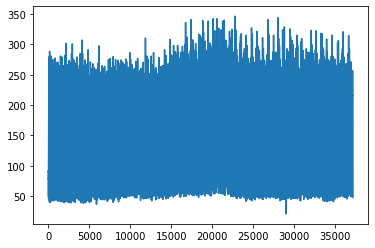

In [14]:
X.shape
plt.plot(X)

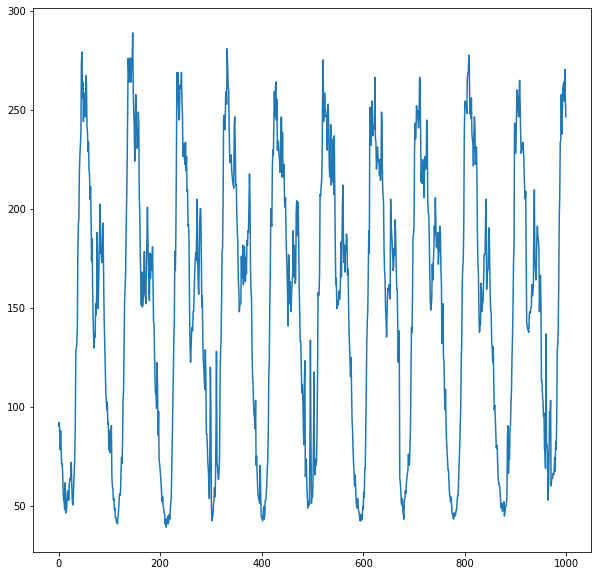

In [15]:
plt.figure(figsize=(10,10))
plt.plot(X[:1000])
plt.show()

In [19]:
#to get error estimates in the manuscript we split the trajectory into non-overlapping segments

n_seed_range=np.arange(25,210,25) #number of partitions to examine
range_Ks =  np.arange(1,80,dtype=int) #range of delays to study
h_K=np.zeros((len(range_Ks),len(n_seed_range)))
for k,K in enumerate(range_Ks):
    traj_matrix = embed.trajectory_matrix(X,K=K-1)
    for ks,n_seeds in enumerate(n_seed_range):
        labels=cl.kmeans_knn_partition(traj_matrix,n_seeds)
        h = op_calc.get_entropy(labels)
        h_K[k,ks]=h
        print('Computed for {} delays and {} seeds.'.format(K,n_seeds))

Computed for 1 delays and 25 seeds.
Computed for 1 delays and 50 seeds.
Computed for 1 delays and 75 seeds.
Computed for 1 delays and 100 seeds.
Computed for 1 delays and 125 seeds.
Computed for 1 delays and 150 seeds.


KeyboardInterrupt: 

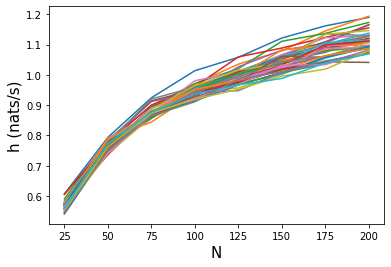

In [17]:
plt.plot(n_seed_range,h_K.T)
plt.xlabel('N',fontsize=15)
plt.ylabel('h (nats/s)',fontsize=15)
plt.show()

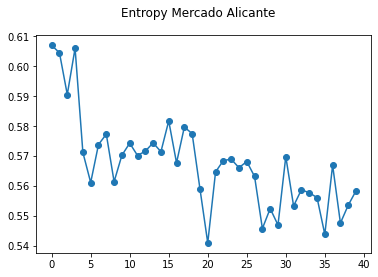

In [18]:
plt.plot(h_K[:,0],marker='o')
plt.suptitle('Entropy Mercado Alicante')
plt.savefig('InformationMercAlic.jpg')
plt.show()

In [1]:
import re #python regular expression matching module
script = re.sub(r'# In\[.*\]:\n','',open('2.0-TimeSteps.py').read())
with open('2.0-TimeStepsScript.py','w') as fh:
    fh.write(script)